<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/Melvin_ml_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML

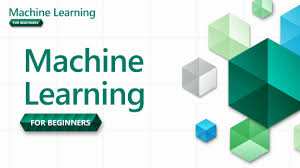

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#setup">A. setup</a>
  - <a href="#mount">a.1. Mount the google drive in colab </a>
  - <a href="#libraries">a.2. Installing Required Libraries</a>
  
- <a href="#tutorial2">I. Tutorial 2: Classifier</a>  
  - <a href="#intro1">Introduction</a>

  - <a href="#part1">Part I:  Linear Classifier By Hand  </a>
    - <a href="#data1">1.1. Get the data </a>
    - <a href="#process">1.2  Data pre-processing</a>
    - <a href="#functions1">1.3 Functions</a>
    - <a href="#linearloop1">1.4 Linear Regressor Loop</a>
    - <a href="#gradient1">1.5 Visualize the gradient descent</a>
    - <a href="#tutorial1">1.6  Let’s check with NumPy</a>
  - <a href="#part2">Part II: Draw Decision Boundaries </a>
    - <a href="#general  "> Linear regressor for a  a parameter vector</a>
  - <a href="#part3">Part III: OOP</a>
    - <a href="#class">class LinearRegressor </a>



<a id="setup"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **A-Setup**</p>

<a id="mount"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.1. Mount the Google Drive in colab</p>

Mounting  Google Drive to Colab  allows us to access and save files directly from our Drive, making it easier to work with our data and projects.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.2. Installing Required Libraries</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os


For this turorial, we will be using the following libraries:
 - [`pandas`] for managing the data.
 - [`numpy`] for mathematical operations.
 - [`seaborn`] for visualizing the data.
 - [`matplotlib`] for visualizing the data.
 - ['os'] for management system

# **Tutorial 2:Classifier**

<a id="intro1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> Introduction: calorimeter showers</p>



**A calorimeter** in the context of experimental particle physics is a sub-detector aiming at measuring the energy of incoming particles. At CERN Large Hadron Collider, the giant multipurpose detectors ATLAS and CMS are both equipped with electromagnetic and hadronic calorimeters. The electronic calorimeter, as its name indicates, is measuring the energy of incoming electrons. It is a destructive method: the energetic electron entering the calorimeter will interact with its dense material via the electromagnetic force. It eventually results in the generation of a shower of particles (electromagnetic shower), with a characteristic average depth and width. The depth is along the direction of the incoming particle and the width is the dimension perpendicular to it.

**Problem?** There can be noisy signals in electromagnetic calorimeters that are generated by hadrons, not electrons.

**our mission** is to help physicists by coding a classifier to select electron-showers (signal) from hadron-showers (background).



<a id="part31"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part I: Linear Classifier By Hand </p>

##  Get the data

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/intro_ML_data/ml_tutorial_2_calo_shower_data.csv')

<a id="data2"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part I: Linear Classifier By Hand </p>

<a id="process"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.2. Data pre-processing </p>

1.2.1 Explore the Data

In [ ]:
df

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron
...,...,...,...
99995,94.844879,22.915035,electron
99996,91.389386,21.634711,electron
99997,66.610819,23.150888,electron
99998,94.607568,25.352104,electron


In [ ]:
df.columns

Index(['shower_depth', 'shower_width', 'type'], dtype='object')

In [ ]:
df.describe()

,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693


**interpretation**:

This dataset consists of:


*   **Features** are "shower_depth" and "shower_width."
*   **Labels (targets)** are stored in the "type" column

* **Number of samples** is equal to 100000



1.2.2 Labels to Binary

In [ ]:
df.loc[df['type']=='hadron',['type']]=1

In [ ]:
df.loc[df['type']=='electron',['type']]=0

In [ ]:
df

,shower_depth,shower_width,type
0,102.726547,41.060509,1
1,55.953644,19.107106,0
2,76.237938,21.859595,0
3,145.829765,18.478401,1
4,151.974596,33.539821,1
...,...,...,...
99995,94.844879,22.915035,0
99996,91.389386,21.634711,0
99997,66.610819,23.150888,0
99998,94.607568,25.352104,0


1.2.3 Create Feature Matrix **X**

In [ ]:
X=df.drop('type',axis=1)
y=df['type']

#check shapes

print("X shape:",X.shape)
print("Y shape:",y.shape)

X shape: (100000, 2)
Y shape: (100000,)


1.2.4 Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape},  y_test: {y_test.shape}")

X_train: (80000, 2), y_train: (80000,)
X_test:  (20000, 2),  y_test: (20000,)


1.2.5 Feature Scaling

In [ ]:
# Get mean and std from training data
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

# Standardize training
X_train_scaled = (X_train - mean_train) / std_train

# Standardize test data
X_test_scaled  = (X_test-X_test.mean(axis=0))/X_test.std(axis=0)

# Check
print("X_train_scaled mean:", X_train_scaled.mean(axis=0))
print("X_train_scaled std:", X_train_scaled.std(axis=0))

X_train_scaled mean: shower_depth   -2.447820e-16
shower_width    1.936229e-16
dtype: float64
X_train_scaled std: shower_depth    1.0
shower_width    1.0
dtype: float64


1.2.6 Feature Matrix Augmentation

In [ ]:

X_train_aug = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))))
X_test_aug  = np.hstack((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))))


In [ ]:
X_test_aug

array([[-0.66874444, -0.98719701,  1.        ],
       [-0.13268463,  3.35657838,  1.        ],
       [-0.02002307, -0.91505057,  1.        ],
       ...,
       [ 0.74017997,  0.69951343,  1.        ],
       [-2.62084878, -0.80855937,  1.        ],
       [-0.35814353, -1.15931637,  1.        ]])

<a id="function"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.3 Functions</p>

1.3.1 Hypothesis Function

In [ ]:
def lin_sum(X, thetas):
    """
    Compute the linear combination of input features and parameters.

    Parameters
    ----------
    X : array-like, shape (m_samples, n_features+1)
        Input features (already augmented with a column of ones for bias).
    thetas : array-like, shape (n_features+1,)
        Parameter vector including bias term.

    Returns
    -------
    ndarray, shape (m_samples, 1)
        Linear sum for each sample.
    """

    return np.dot(X, thetas)

In [ ]:
n_param = X_train_aug.shape[1]

In [ ]:
thetas = np.random.rand(n_param, 1)

In [ ]:
lin_sum(X_train_aug,thetas).shape

(80000, 1)

1.3.2 Logistic Function

The sigmoid function, often denoted as sigma(z), is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where \( z \) is the input

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid function.

    Parameters
    ----------
    z : array-like
        Input value(s).

    Returns
    -------
    ndarray
        Sigmoid of the input value(s).
    """
    return 1 / (1 + np.exp(-z))

1.3.3 Partial Derivatives of Cross-Entropy Cost Function

In the linear assumption, the partial derivatives of the cross-entropy cost function are
(amazingly) the same as with the Mean Square Error:

$$ \frac{\partial  Cost (\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [ ]:
def gradient_cross_entropy(y_true, y_pred, X):
    """
    Compute the gradient vector of the cross-entropy cost function.

    Parameters
    ----------
    y_true : array-like, shape (m,) or (m,1)
        Binary target (0 or 1) for each sample.
    y_pred : array-like, shape (m,) or (m,1)
        Predicted score for each sample.
    X : array-like, shape (m, n_features+1)
        Input features, already augmented with a column of ones for bias.

    Returns
    -------
    ndarray, shape (n_features+1, 1)
        Column vector of partial derivatives with respect to each model parameter.
    """

    m = len(y_true)
    y_true = np.asarray(y_true, dtype=np.float64).reshape(-1, 1)
    y_pred = np.asarray(y_pred, dtype=np.float64).reshape(-1, 1)
    X = np.asarray(X, dtype=np.float64)
    gradient=(1/m) * np.dot(X.T, (y_pred - y_true))

    return gradient.reshape(-1, 1)

In [ ]:
y_pred_train = sigmoid(lin_sum(X_train_aug, thetas))
y_pred_train.shape

(80000, 1)

In [ ]:
gradient_cross_entropy(y_train,y_pred_train,X_train_aug)

array([[-0.18097631],
       [-0.10514023],
       [ 0.16004296]])

1.3.4 Cross-Entropy Cost Function

 the cross-entropy cost is :

$$C(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] $$

In [ ]:
def cross_entropy_cost(y_true, y_pred):
    """
    Compute the cross-entropy cost function.

    Parameters
    ----------
    y_true : array-like, shape (m,) or (m,1)
        Binary target (0 or 1) for each sample.
    y_pred : array-like, shape (m,) or (m,1)
        Predicted score for each sample.

    Returns
    -------
    float
        Cross-entropy cost.
    """
    # Clip predictions to avoid log(0) issues
    y_true = np.asarray(y_true, dtype=np.float64).reshape(-1, 1)
    y_pred = np.asarray(y_pred, dtype=np.float64).reshape(-1, 1)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    # Compute cross-entropy cost
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost

In [ ]:
cross_entropy_cost(y_train,y_pred_train)

np.float64(0.5038537188857324)

<a id="classifier loop"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.4 Classifier Loop </p>

In [ ]:
def should_print_iteration(iter_index, first_step, second_step, index_changing_step):
    """
    Trigger a print if iter_index matches step rules:
    print every `first_step` iterations before `index_changing_step`,
    then every `second_step` iterations afterwards.
    """
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

stopping criterion: gradient norm

stopping criterion:cost change

In [ ]:
# Hyperparameters
alpha       = 0.1    # learning rate
N           = 10000  # maximum number of iterations
epsilon     = 1e-6   # tolerance threshold for gradient norm (stopping criterion)
cost_tol    = 1e-8   # tolerance threshold for cost drop (stop. criterion)
cost_change = np.inf # initialize cost change for first iteration

# Number of features + 1 (number of columns in X)
n_param = X_train_aug.shape[1]

# Initialization of theta vector
thetas = np.random.rand(n_param, 1)

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")


# -------------------
#   Start iterations
# -------------------
for iter_idx in range(N):
    # Get predictions (hypothesis function)
    y_pred_train = sigmoid(lin_sum(X_train_aug, thetas))
    y_pred_test = sigmoid(lin_sum(X_test_aug, thetas))

    # Calculate and store costs with train and test datasets
    cost_train = cross_entropy_cost(y_train, y_pred_train)
    cost_test  = cross_entropy_cost(y_test, y_pred_test)
    costs_train.append(cost_train)
    costs_test.append(cost_test)

    # Compute gradient
    grad_cost = gradient_cross_entropy(y_train.values.reshape(-1, 1), y_pred_train, X_train_aug)

    # Update parameters
    thetas = thetas - alpha * grad_cost

    # Gradient norm (for early stopping & printing)
    grad_cost_norm = np.linalg.norm(grad_cost)

    # Cost change (for early stopping & printing)
    if iter_idx > 0:
        cost_change = costs_train[-1] - costs_train[-2]

    # Print selected iterations
    if should_print_iteration(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"‖grad‖ = {grad_cost_norm.item():.4e}\t"
            f"Train cost = {cost_train:.5e}\t"
            f"Cost change = {cost_change:>+10.2e}\t"
            f"Test cost = {cost_test:.5e}"
        )

    # Exit conditions
    if grad_cost_norm < epsilon:
        print(f"\nStopping early due to small gradient norm at iteration {iter_idx+1}")
        break
    if abs(cost_change) < cost_tol and iter_idx > 0:
        print(f"\nStopping early due to small cost change at iteration {iter_idx+1}")
        break


print(f'\nEnd of gradient descent after {iter_idx+1} iterations')

print('Optimized parameters:')
for j in range(len(thetas)):
    print(f'\tParameter {j} = {thetas[j,0]:.4f}')

Starting gradient descent

Iter    0	‖grad‖ = 3.2622e-01	Train cost = 5.75116e-01	Cost change =       +inf	Test cost = 5.71900e-01
Iter   10	‖grad‖ = 2.4989e-01	Train cost = 4.91856e-01	Cost change =  -6.49e-03	Test cost = 4.88467e-01
Iter   20	‖grad‖ = 1.9700e-01	Train cost = 4.41823e-01	Cost change =  -4.01e-03	Test cost = 4.38290e-01
Iter   30	‖grad‖ = 1.5999e-01	Train cost = 4.09894e-01	Cost change =  -2.64e-03	Test cost = 4.06229e-01
Iter   40	‖grad‖ = 1.3335e-01	Train cost = 3.88331e-01	Cost change =  -1.82e-03	Test cost = 3.84539e-01
Iter   50	‖grad‖ = 1.1361e-01	Train cost = 3.73044e-01	Cost change =  -1.32e-03	Test cost = 3.69130e-01
Iter   60	‖grad‖ = 9.8560e-02	Train cost = 3.61760e-01	Cost change =  -9.91e-04	Test cost = 3.57727e-01
Iter   70	‖grad‖ = 8.6810e-02	Train cost = 3.53146e-01	Cost change =  -7.67e-04	Test cost = 3.48998e-01
Iter   80	‖grad‖ = 7.7433e-02	Train cost = 3.46384e-01	Cost change =  -6.09e-04	Test cost = 3.42124e-01
Iter   90	‖grad‖ = 6.9803e-02	Train c

<a id="classifier loop"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.5 Plot cost versus epochs</p>

In [ ]:
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

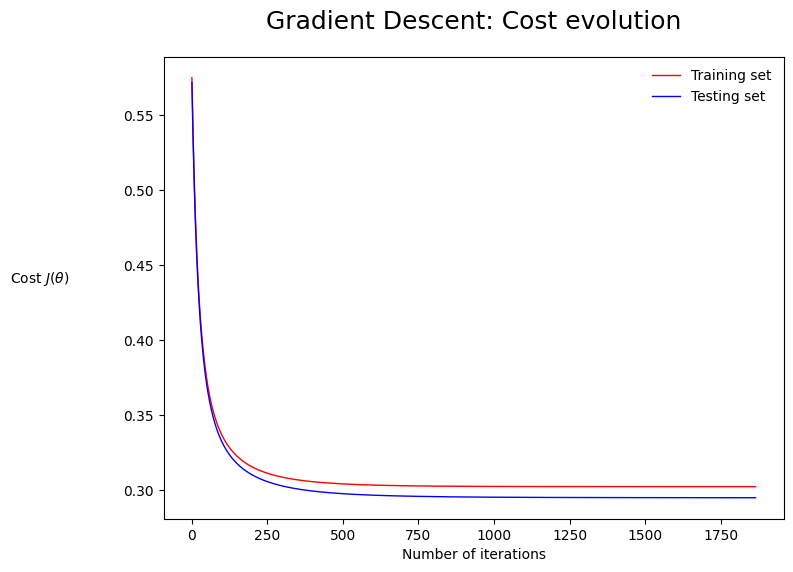

In [ ]:
plot_cost_vs_iter(costs_train, costs_test)

1.5.1 Plot Interpretation

1.5.2 Cost gap?

A larger gap between the training and test cost values would suggest that the model is **overfitting** ,meaning it performs well on the training data but generalizes poorly to unseen test data.

<a id="classifier loop"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.6 Performance Measures</p>

1.6.1 Binary Predictions

In [ ]:
def make_predictions(thetas, X, boundary=0.5):
    """
    Make binary predictions based on logistic regression scores.

    Parameters
    ----------
    thetas : array-like, shape (n_features+1, 1)
        Optimized parameter vector.
    X : array-like, shape (m_samples, n_features+1)
        Input features, already augmented with a column of ones for bias.
    boundary : float, default=0.5
        The decision boundary for classification. Scores above or equal to this
        value are classified as 1, otherwise as 0.

    Returns
    -------
    ndarray, shape (m_samples,)
        Binary predictions (0 or 1) for each sample.
    """
    scores = sigmoid(lin_sum(X, thetas)).flatten() # shape (m,)
    return (scores >= boundary).astype(int)

In [ ]:
y_pred_train=make_predictions(thetas,X_train_aug)

In [ ]:
y_pred_train.shape

(80000,)

In [ ]:
y_train.shape

(80000,)

1.6.2 Accuracy

In [ ]:
def manual_accuracy(y_true, y_pred):
    """
    Compute the accuracy of the classifier manually.

    Parameters
    ----------
    y_true : array-like, shape (m,) or (m,1)
        True binary labels (0 or 1).
    y_pred : array-like, shape (m,) or (m,1)
        Predicted binary labels (0 or 1).

    Returns
    -------
    float
        The accuracy of the classifier.
    """
    y_true = np.asarray(y_true, dtype=np.float64).reshape(-1, 1)
    y_pred = np.asarray(y_pred, dtype=np.float64).reshape(-1, 1)
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [ ]:
print(f'the value of accuracy is ',manual_accuracy(y_train,y_pred_train))

the value of accuracy is  1.0


1.6.3 Recall

In [ ]:
def manual_recall(y_true, y_pred):
    """
    Compute the recall of the classifier manually.

    Parameters
    ----------
    y_true : array-like, shape (m,) or (m,1)
        True binary labels (0 or 1).
    y_pred : array-like, shape (m,) or (m,1)
        Predicted binary labels (0 or 1).

    Returns
    -------
    float
        The recall of the classifier.
    """
    # Convert to numpy arrays for easier indexing
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # True Positives: instances where y_true is 1 and y_pred is 1
    true_positives = np.sum((y_true == 1) & (y_pred == 1))

    # Actual Positives: instances where y_true is 1
    actual_positives = np.sum(y_true == 1)

    # Avoid division by zero
    if actual_positives == 0:
        return 0.0

    # Recall = True Positives / Actual Positives
    recall = true_positives / actual_positives
    return recall

In [ ]:
print(f'the value of recall is ',manual_recall(y_train,y_pred_train))

the value of recall is  1.0


Part II: Draw Decision Boundaries

In [ ]:
all_sig = df[df['type'] == 'electron'][['shower_depth', 'shower_width']]
all_bkg = df[df['type'] ==  'hadron' ][['shower_depth', 'shower_width']]

In [ ]:
X1NAME = 'shower_depth'; X1LABEL = 'Shower depth [mm]'
X2NAME = 'shower_width'; X2LABEL = 'Shower width [mm]'
X1MIN  = 0 ; X1MAX = 200
X2MIN  = 0 ; X2MAX =  60

# Raw scatter plot
def plot_scatter(sig, bkg, boundaries=False,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='dodgerblue', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='darkorange', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  # if boundaries:
    # ... your code here ...

  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()